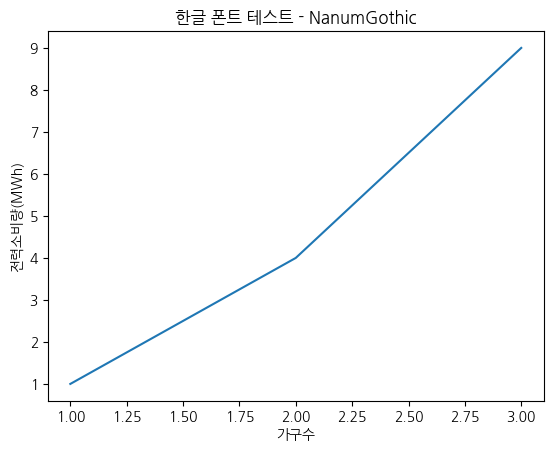

In [ ]:
# 1) 나눔고딕 설치
!apt-get -qq install -y fonts-nanum > /dev/null

# 2) Matplotlib에 '파일 경로로' 폰트를 직접 등록 (재시작 불필요)
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import os

# 나눔고딕 파일 경로 (콜랩 기본 경로)
candidates = [
    "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    "/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf",
    "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf",
]
font_path = next((p for p in candidates if os.path.exists(p)), None)

if font_path is None:
    # 대체로 Noto CJK도 시도
    !apt-get -qq install -y fonts-noto-cjk > /dev/null
    candidates_noto = [
        "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",
        "/usr/share/fonts/opentype/noto/NotoSansCJKkr-Regular.otf",
        "/usr/share/fonts/opentype/noto/NotoSansCJK-Medium.ttc",
    ]
    font_path = next((p for p in candidates_noto if os.path.exists(p)), None)

if font_path is None:
    raise FileNotFoundError("한글 폰트 파일을 찾지 못했습니다. fonts-nanum 또는 fonts-noto-cjk 설치를 확인해주세요.")

# 인라인 등록 → 즉시 사용 가능
fm.fontManager.addfont(font_path)

# 폰트 패밀리 이름은 보통 파일 내 이름과 동일 (NanumGothic 또는 Noto Sans CJK KR)
# 안전하게 이름 후보를 몇 개 돌려서 먼저 적용되는 걸로 사용
possible_families = ["NanumGothic", "Nanum Gothic", "Noto Sans CJK KR", "Noto Sans CJK"]
for fam in possible_families:
    try:
        rcParams["font.family"] = fam
        rcParams["axes.unicode_minus"] = False
        # 테스트 플롯
        plt.figure()
        plt.title(f"한글 폰트 테스트 - {fam}")
        plt.plot([1,2,3], [1,4,9])
        plt.xlabel("가구수")
        plt.ylabel("전력소비량(MWh)")
        plt.show()
        break
    except Exception as e:
        continue


In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('시도별_인구수_1823-원본.csv', encoding='cp949')


df.head()

행정구역(시군구)별      2018      2019      2020      2021      2022      2023
0  행정구역(시군구)별  총인구수 (명)  총인구수 (명)  총인구수 (명)  총인구수 (명)  총인구수 (명)  총인구수 (명)
1          전국  51826059  51849861  51829023  51638809  51439038  51325329
2         경기도  13077153  13239666  13427014  13565450  13589432  13630821
3       서울특별시   9765623   9729107   9668465   9509458   9428372   9386034
4       부산광역시   3441453   3413841   3391946   3350380   3317812   3293362

In [ ]:
import pandas as pd

# 예시 데이터프레임 불러오기
df = pd.read_csv('시도별_인구수_1823-원본.csv', encoding='cp949', skiprows=[1])

# '전국' 행 제거
df = df[df.iloc[:, 0] != '전국']

# 행정구역 컬럼 이름 확인
col_name = df.columns[0]

# 매핑 딕셔너리 생성
mapping = {
    '경기도': '경기',
    '서울특별시': '서울',
    '부산광역시': '부산',
    '경상남도': '경남',
    '인천광역시': '인천',
    '경상북도': '경북',
    '대구광역시': '대구',
    '충청남도': '충남',
    '전라남도': '전남',
    '전북특별자치도': '전북',
    '충청북도': '충북',
    '강원특별자치도': '강원',
    '대전광역시': '대전',
    '광주광역시': '광주',
    '울산광역시': '울산',
    '제주특별자치도': '제주',
    '세종특별자치시': '세종'
}

# 행정구역명 치환
df[col_name] = df[col_name].map(mapping)




# 결과를 CSV 파일로 저장
df.to_csv('시도별_인구수_변환완료.csv', index=False, encoding='cp949')

# 결과 확인
df.head()


행정구역(시군구)별      2018      2019      2020      2021      2022      2023
1         경기  13077153  13239666  13427014  13565450  13589432  13630821
2         서울   9765623   9729107   9668465   9509458   9428372   9386034
3         부산   3441453   3413841   3391946   3350380   3317812   3293362
4         경남   3373988   3362553   3340216   3314183   3280493   3251158
5         인천   2954642   2957026   2942828   2948375   2967314   2997410

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# [1] 전처리된 데이터 불러오기
df = pd.read_csv('시도별_인구수_변환완료.csv', encoding='cp949')

# [2] 연도 컬럼만 추출
year_columns = df.columns[1:]

# [3] 연도별 총 인구수 계산
total_population = df[year_columns].sum().reset_index()
total_population.columns = ['연도', '인구수']
total_population['연도'] = total_population['연도'].astype(int)
total_population['인구수'] = total_population['인구수'].astype(int)

# [4] 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_population, x='연도', y='인구수', marker='o', linewidth=2.5)

# Y축 눈금: 지수 표기 대신 천 단위 콤마
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('전국 인구수 연도별 변화 추이', fontsize=16)
plt.xlabel('연도')
plt.ylabel('총 인구수 (명)')
plt.grid(True)
plt.tight_layout()
plt.show()


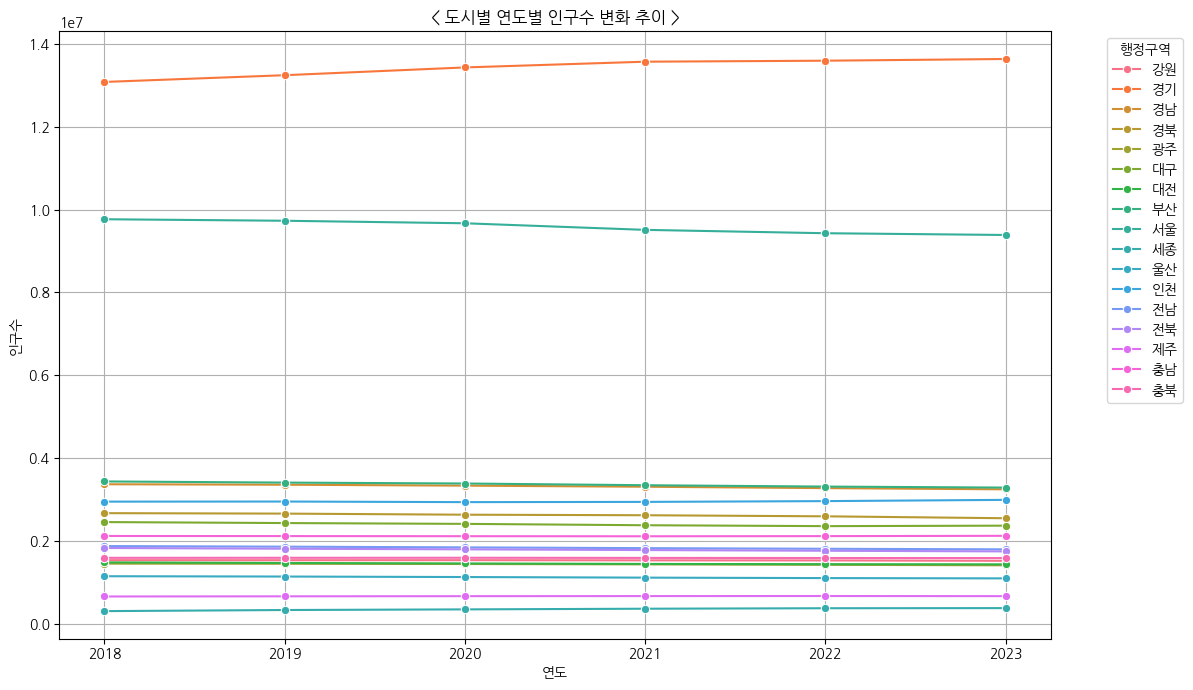

In [ ]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_long, x='연도', y='인구수', hue=col_name, marker='o')
plt.title('< 도시별 연도별 인구수 변화 추이 >')
plt.ylabel('인구수')
plt.grid(True)
plt.legend(title='행정구역', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# 가장 최근 연도와 과거 연도 기준 변화율 계산
latest_year = df_long['연도'].max()
earliest_year = df_long['연도'].min()

pop_latest = df_long[df_long['연도'] == latest_year][[col_name, '인구수']].rename(columns={'인구수': 'latest'})
pop_earliest = df_long[df_long['연도'] == earliest_year][[col_name, '인구수']].rename(columns={'인구수': 'earliest'})

pop_change = pd.merge(pop_earliest, pop_latest, on=col_name)
pop_change['변화율(%)'] = (pop_change['latest'] - pop_change['earliest']) / pop_change['earliest'] * 100

# 상위 감소 도시
pop_change.sort_values('변화율(%)').head()


행정구역(시군구)별  earliest   latest    변화율(%)
3          경북   2676831  2554324 -4.576568
10         울산   1155623  1103661 -4.496449
13         전북   1836832  1754757 -4.468291
7          부산   3441453  3293362 -4.303153
12         전남   1882970  1804217 -4.182382